In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load the dataset

In [ ]:
import pandas as pd
import os

dataset_dir = '/content/gdrive/MyDrive/Essentials in Text and Speech Processing'

x_train = pd.read_csv(os.path.join(dataset_dir, 'x_train.csv'))
x_test = pd.read_csv(os.path.join(dataset_dir, 'x_test.csv'))
y_train = pd.read_csv(os.path.join(dataset_dir, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(dataset_dir, 'y_test.csv'))


## Preprocess one more time lol

In [ ]:
# Check for missing values in x_train
missing_values_train = x_train.isnull().sum()
missing_values_test = x_test.isnull().sum()

print(f"Missing values in x_train:\n{missing_values_train[missing_values_train > 0]}")
print(f"Missing values in x_test:\n{missing_values_test[missing_values_test > 0]}")

Missing values in x_train:
requirements    3
dtype: int64
Missing values in x_test:
description     1
requirements    3
dtype: int64


In [ ]:
x_train['requirements'] = x_train['requirements'].fillna('')
x_test['requirements'] = x_test['requirements'].fillna('')
x_test['description'] = x_test['description'].fillna('')

In [ ]:

import pandas as pd

vectorizer = TfidfVectorizer(max_features=5000)

x_train_tfidf = vectorizer.fit_transform(x_train['title'] + " " + x_train['company_profile'] + " " + x_train['description'] + " " + x_train['requirements'])

x_test_tfidf = vectorizer.transform(x_test['title'] + " " + x_test['company_profile'] + " " + x_test['description'] + " " + x_test['requirements'])

x_train = pd.DataFrame(x_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
x_test = pd.DataFrame(x_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print(x_train.shape, x_test.shape)


(14304, 5000) (3576, 5000)


In [ ]:
# Flatten y_train and y_test by converting them to NumPy arrays and then applying ravel
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Oversampling the minority class

> 인용구 추가



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#oversampling
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


<ipython-input-48-b499d2f9377b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=ax[0], palette=['skyblue', 'salmon'])
<ipython-input-48-b499d2f9377b>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])  # Label the classes
<ipython-input-48-b499d2f9377b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, ax=ax[1], palette=['skyblue', 'salmon'])
<ipython-input-48-b499d2f9377b>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xtic

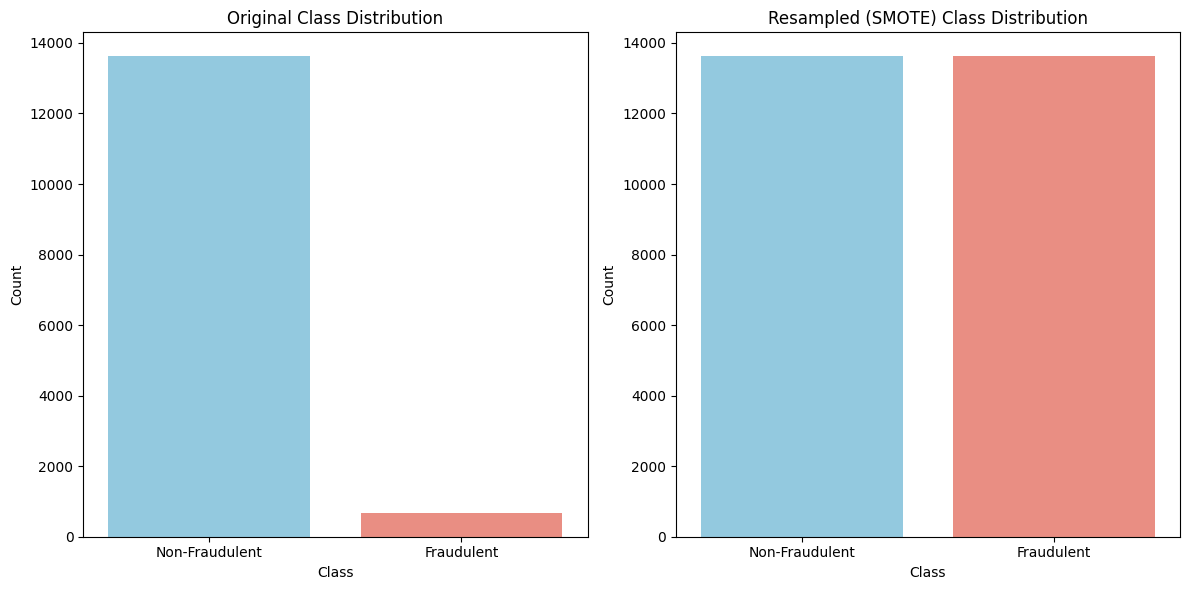

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# before and after oversampling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# og data
sns.countplot(x=y_train, ax=ax[0], palette=['skyblue', 'salmon'])
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# after oversampling data
sns.countplot(x=y_train_res, ax=ax[1], palette=['skyblue', 'salmon'])
ax[1].set_title('Oversampled Class Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.tight_layout()
plt.show()


## Train the model (naive bayes)

In [ ]:
# train naive bayes
model = MultinomialNB()
model.fit(x_train_res, y_train_res)


MultinomialNB()

## Evaluate the model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# predict
y_pred_res = model.predict(x_test)

# calc metrics
accuracy = accuracy_score(y_test, y_pred_res)
precision = precision_score(y_test, y_pred_res)
recall = recall_score(y_test, y_pred_res)
f1 = f1_score(y_test, y_pred_res)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.9348
Precision: 0.4301
Recall: 0.8840
F1-Score: 0.5787


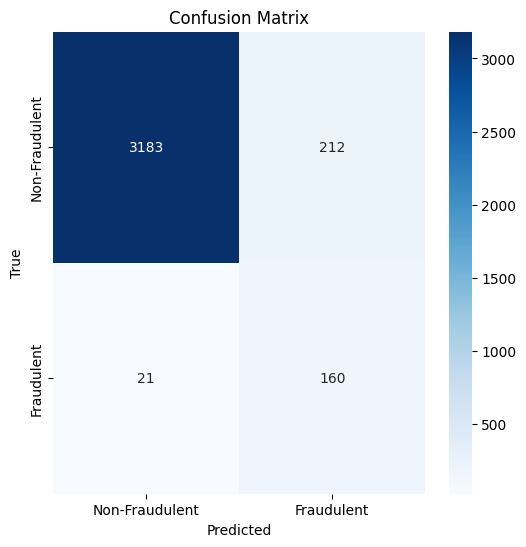

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_res)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Bert Model

In [ ]:
# !pip install transformers torch scikit-learn

In [ ]:
import pandas as pd
import os

dataset_dir = '/content/gdrive/MyDrive/Essentials in Text and Speech Processing'

x_train = pd.read_csv(os.path.join(dataset_dir, 'x_train.csv'))
x_test = pd.read_csv(os.path.join(dataset_dir, 'x_test.csv'))
y_train = pd.read_csv(os.path.join(dataset_dir, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(dataset_dir, 'y_test.csv'))


In [ ]:
x_train['requirements'] = x_train['requirements'].fillna('')
x_test['requirements'] = x_test['requirements'].fillna('')
x_test['description'] = x_test['description'].fillna('')

In [ ]:
import pandas as pd

x_train['text'] = x_train['title'] + ' ' + x_train['company_profile'] + ' ' + x_train['description'] + ' ' + x_train['requirements']
x_test['text'] = x_test['title'] + ' ' + x_test['company_profile'] + ' ' + x_test['description'] + ' ' + x_test['requirements']


In [ ]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class_counts = y_train.value_counts()
total_count = len(y_train)

# calculate class weights for each class
class_weights = torch.tensor([total_count / class_counts[0], total_count / class_counts[1]], dtype=torch.float).to(device)

# define the loss function with class weights
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt")

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

y_train = y_train.iloc[:, 0].tolist()
y_test = y_test.iloc[:, 0].tolist()


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# create dataset and dataloader
train_dataset = CustomDataset(x_train['text'].tolist(), y_train, tokenizer)
test_dataset = CustomDataset(x_test['text'].tolist(), y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [ ]:
# check batch
for batch in train_loader:
    print(batch['input_ids'].shape, batch['attention_mask'].shape, batch['label'].shape)
    break

torch.Size([16, 512]) torch.Size([16, 512]) torch.Size([16])


In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)

In [ ]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# training
epochs = 1
for epoch in range(epochs):
    model.train()
    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1}/{epochs} completed. Loss: {loss.item()}")


100%|██████████| 894/894 [21:01<00:00,  1.41s/it]


Epoch 1/1 completed. Loss: 0.2137514054775238


In [ ]:
#predict model

model.eval()
clw_predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        clw_predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# calc metrics
accuracy = accuracy_score(true_labels, clw_predictions)
precision = precision_score(true_labels, clw_predictions)
recall = recall_score(true_labels, clw_predictions)
f1 = f1_score(true_labels, clw_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.977069351230425
Precision: 0.9901
Recall: 0.5525
F1 Score: 0.7092


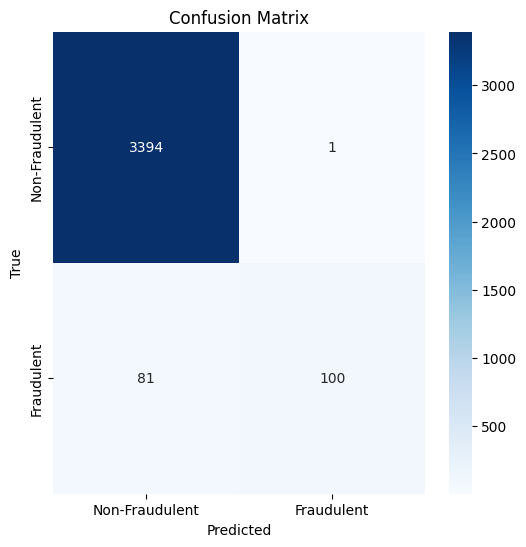

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_bert_with_clw = confusion_matrix(true_labels, clw_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_bert_with_clw, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Without class weighting

In [ ]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# training
epochs = 1
for epoch in range(epochs):
    model.train()
    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1}/{epochs} completed. Loss: {loss.item()}")


100%|██████████| 894/894 [21:02<00:00,  1.41s/it]


Epoch 1/1 completed. Loss: 0.2729296386241913


In [ ]:
#predict model

model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# calc metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9731543624161074
Precision: 0.9208
Recall: 0.5138
F1 Score: 0.6596


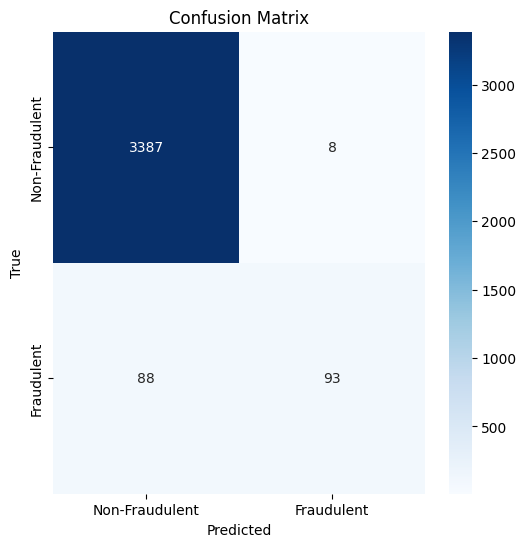

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_bert = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()